epochs 0 loss 7.50187349319458
epochs 10 loss 4.13014554977417
epochs 20 loss 2.3391189575195312
epochs 30 loss 1.3399405479431152
epochs 40 loss 0.7661994695663452
epochs 50 loss 0.5094283223152161
epochs 60 loss 0.43464961647987366
epochs 70 loss 0.42010951042175293
epochs 80 loss 0.41657179594039917
epochs 90 loss 0.41303351521492004
epochs 100 loss 0.4102790355682373
epochs 110 loss 0.40885815024375916
epochs 120 loss 0.4080948531627655
epochs 130 loss 0.40750473737716675
epochs 140 loss 0.40698596835136414
epochs 150 loss 0.40654435753822327
epochs 160 loss 0.4061717092990875
epochs 170 loss 0.4058606028556824
epochs 180 loss 0.4056156873703003
epochs 190 loss 0.4054185152053833
epochs 200 loss 0.405263215303421
epochs 210 loss 0.40514400601387024
epochs 220 loss 0.4050508439540863
epochs 230 loss 0.40498077869415283
epochs 240 loss 0.4049290418624878
epochs 250 loss 0.4048909842967987
epochs 260 loss 0.4048633277416229
epochs 270 loss 0.40484318137168884
epochs 280 loss 0.4048288

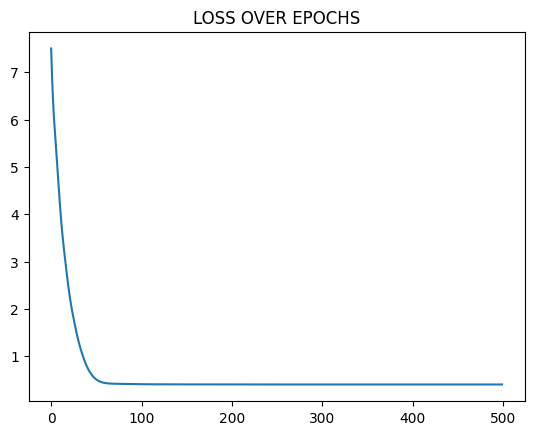

In [15]:
# %%time
import pandas as pd
import numpy as np

import torch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
random_seed = 42
torch.manual_seed(random_seed)
df = pd.read_csv("/content/sample_data/california_housing_train.csv")

df = df.drop("longitude", axis = 1)
df = df.drop("latitude", axis = 1)
df_X = df.drop("median_house_value", axis = 1)
df_y = df["median_house_value"]

x_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = x_scaler.fit_transform(df_X)
y_train = y_scaler.fit_transform(np.array(df_y).reshape(-1,1))

num_X = pd.DataFrame(X_train, columns = df_X.columns).to_numpy()
num_y = pd.DataFrame(y_train, columns = ["median_house_value"]).to_numpy()
split = int(0.8 * len(num_X))
X = torch.from_numpy(num_X).type(torch.float32)
y = torch.from_numpy(num_y).type(torch.float32)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

class model(torch.nn.Module):
  def __init__(self, X_shape):
    super().__init__()
    self.weights = torch.nn.Parameter(torch.randn(X_shape, 1, dtype=torch.float32))
    self.bias = torch.nn.Parameter(torch.randn(1, dtype=torch.float32))
    self.relu = torch.nn.SELU()

  def forward(self, X):
    return self.relu((torch.matmul(X, self.weights) + self.bias))

model = model(X_train.shape[1])
# model.build()
k = model.forward(X_train)

lossfn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.05)

epochs = 500
loss_l = []
for epoch in range(epochs):
  ypreds = model.forward(X_train)
  loss = lossfn(ypreds,y_train)
  loss_l.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch % 10 == 0:
      print(f"epochs {epoch} loss {loss}")

model.eval()
y_t = model(X_test)
print(f"Test_loss: {lossfn(y_t, y_test)}")

y_og = y_scaler.inverse_transform(y_t.detach().numpy())
y_og_test = y_scaler.inverse_transform(y_test.detach().numpy())

y_og_test[:5],y_og[:5]
plt.plot(np.arange(epochs),loss_l)
plt.title("LOSS OVER EPOCHS")
plt.show()
